In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from impyute.imputation.cs import mice
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [2]:
#pd.set_option( "display.max_columns", None)
%store -r CLASSED_SDSS_TRAIN
%store -r SDSS_B_CAN
pd.set_option("display.max_rows", None, "display.max_columns", None)

CLASSED_SDSS_TRAIN

objid          ra        dec         u         g         r  \
0    1237661871320268811  155.889596  39.886869  18.28582  18.18858  18.01644   
1    1237673808119464381  124.272881  19.978564  21.12064  20.48794  19.87833   
3    1237671936041681101  255.352643  39.910305  17.23728  16.65306  16.19567   
4    1237671123757891809  128.930043   9.621656  19.18801  18.69809  18.26784   
5    1237668625158897767  182.465669  18.168568  19.36534  18.94394  18.62410   
7    1237668365313572939  238.386244  12.947704  17.54824  17.42810  17.29662   
8    1237667910607044742  218.841420  20.354973  19.60163  19.19837  18.77882   
9    1237667910587646233  171.011260  23.612737  20.69846  20.38663  20.13416   
10   1237667783377813621  200.296693  22.270032  19.48164  19.08968  18.72749   
11   1237667782289719314  164.912662  20.956080  19.99873  19.51331  18.97549   
13   1237667735030268065  147.501254  18.071877  20.63985  18.87645  17.70546   
14   1237667734499754110  162.755721  20.455563  19.74168  19.55022  19.35767   
15   1237667734496346397  154.554864  19.051175  21.67273  20.89793  20.21053   
16   1237667431172931698  153.172378  24.656503  19.56624  19.63325  19.57969   
17   1237665549428261078  219.170747  23.350910  19.30324  19.01610  18.91188   
18   1237665428636958859  220.987050  25.029041  20.21196  19.71662  19.37826   
19   1237665129611657333  168.161546  34.777513  19.32475  19.41855  19.30163   
20   1237665127455129778  145.450478  27.477454  19.36598  19.24813  18.89583   
21   1237664878338637970  140.964682  28.256983  19.69847  19.19810  19.09124   
22   1237664819283755108  172.309629  37.054973  20.03340  19.50891  19.08246   
24   1237664291548889415  208.345171  14.594219  19.71175  19.22515  18.78058   
25   1237664289932772087  195.170991  14.291492  24.61553  23.27059  21.97186   
26   1237663546907820228  140.400969  62.264499  19.60818  19.22194  18.67280   
29   1237662530066055790  213.995049  13.339923  22.06392  20.51769  19.04876   
31   1237662499465396470  230.165388  42.186442  19.71902  19.31061  18.94388   
32   1237662305658929328  230.541639  31.737317  20.62232  20.16685  19.77809   
35   1237662226239979791  249.159090  21.215441  19.54039  19.42304  19.38403   
37   1237661950790729805  183.384043  13.122479  18.65001  18.33856  18.02651   
38   1237661873491215013  226.539625  37.514145  24.09318  22.71488  21.21583   
39   1237661850387021943  158.265443  41.268401  19.45137  19.48624  19.13610   
41   1237661816562384960  197.391385  11.906829  19.46110  18.83264  18.38190   
42   1237661812803502126  165.764699  11.971279  19.11481  18.84546  18.70231   
43   1237661433778078003  206.388223  44.883230  21.65504  20.75091  20.31823   
44   1237661388140577077  209.773934  55.741492  20.55700  20.38951  19.99067   
45   1237661361303388302  218.523717  42.054435  20.37613  19.91200  19.49604   
46   1237661070869856551  175.532248  15.798387  20.97350  20.62083  20.19469   
47   1237661070327415011  162.443030  14.494031  21.01042  20.79802  20.56080   
48   1237660670888050933  146.646116  10.285033  19.96293  19.51063  19.21280   
49   1237660343935959200  143.527789  39.442270  20.58216  19.98277  19.52171   
51   1237659133286023383  228.059470  47.059212  21.62358  21.05507  20.53214   
53   1237658424093376547  166.100303   7.514771  17.81826  17.39206  17.01676   
54   1237658299531657263  153.055609   6.515887  18.00632  17.56312  17.26083   
55   1237658297921437856  154.013063   5.217328  19.89581  19.30111  18.89064   
56   1237658205571514647  140.880436  41.424280  21.13091  20.47722  19.94207   
57   1237657632190496931  149.657546  50.665981  19.55885  19.49273  19.17614   
58   1237657400807588143  136.065114  42.634651  21.18816  21.05313  20.60274   
59   1237655370355310614  154.743944  59.191076  18.51145  18.06032  17.72726   
60   1237655349967257837  244.015716  46.540357  19.93078  19.65040  19.42391   
61   1237655108913463445  178.518892  60.372435  2

In [3]:
CLASSED_SDSS_TRAIN_2 = CLASSED_SDSS_TRAIN.drop(columns=['class', 'cat','run','rerun','camcol','objid','specobjid','plate','mjd','fiberid','field','type'])
nogx = CLASSED_SDSS_TRAIN[(CLASSED_SDSS_TRAIN['cat']!='BLAZGX')]

spec_slop = nogx.iloc[: , -8:]
spec_slop_shuf = spec_slop.sample(frac=1)
#spec_slop_shuf = spec_slop_shuf[(spec_slop_shuf['cat']!='BLAZXR')]
spec_slop_shuf

a_gu      a_ri       a_gi      a_rz       a_gz      a_iz       a_iu  \
319   0.788928  0.792659   0.737114  1.044363   0.900736  1.325792   0.548420   
39   -0.233725  0.469287   0.931418  0.227928   0.660876 -0.041935   0.355747   
243   0.501044  1.478480   1.648522  0.124535   0.804163 -1.389301   0.813869   
449   0.070748  2.155841   2.103533  2.205200   2.147131  2.260388   0.746970   
798   0.923639  3.625574   3.285448  3.041620   3.036200  2.388706   1.414082   
374   5.625176  1.717515   3.296717  1.912925   2.972821  2.131410   3.747701   
607        NaN  2.744168   6.939554  1.074564   4.790522 -0.792206        NaN   
218   2.635543  1.199361   0.773524  0.262663   0.340431 -0.784652   1.180027   
847  -1.522131  2.969756   4.544719  2.446904   3.799146  1.862307   1.408614   
156  -1.054346  0.091270   0.818435  2.257542   1.891650  4.679634   0.067787   
170   1.822337 -0.037353   0.140213  0.745235   0.551585  1.620240   0.802687   
960   2.237704  2.256990   3.205959  2.393549   3.022590  2.546234   2.235772   
18    1.608193  0.875599   1.037380  1.138187   1.147004  1.431784   1.028201   
406   3.189528  2.583882   3.659174  2.016494   3.026265  1.382102   2.796330   
79    1.804295  1.318671   1.271019  1.287896   1.266146  1.253487   1.130565   
123  -0.533408  0.281692   0.909322  1.219611   1.287045  2.268290   0.275366   
96    1.418408  1.370209   1.309230  1.291798   1.280016  1.204126   0.990657   
28    1.288687  2.053664   3.047712  1.991909   2.735061  1.922862   1.824278   
797   0.440029  1.321361   0.774692  0.481982   0.432478 -0.456522   0.296785   
36    0.634768  1.506723   0.657447 -0.023385  -0.007304 -1.734186   0.251757   
273        NaN  5.160246   5.936359  2.485977   4.146242 -0.504102        NaN   
299   1.089909  1.118799   1.010297  1.026120   0.985893  0.922497   0.746478   
233   0.759628  0.916055   0.197415  1.025352   0.461505  1.147555   0.174243   
284   4.607058  2.059710   2.778812  1.900273   2.485075  1.722007   2.945584   
82    0.242028  1.100212   0.537030  0.578233   0.386265 -0.005388   0.132763   
219   0.624442  0.148111   0.511765  0.029138   0.340646 -0.103885   0.516467   
227   0.960819  0.098361  -0.082172 -0.189620  -0.201534 -0.511610   0.296580   
68    0.333315  4.084649   3.002048  3.482894   2.948690  2.810076   0.890675   
248   1.629653  1.699353   1.633444  1.579389   1.581138  1.445258   1.184341   
293   3.840011  1.494199   1.734340  1.141027   1.459673  0.746148   2.157711   
241   0.414180 -0.000756  -0.313862  0.911099   0.309993  1.930637  -0.031195   
162   0.001321  0.193641   0.608202  0.088283   0.430949 -0.029518   0.321735   
314   1.873273  1.395864   1.395378  1.187603   1.272905  0.954748   1.213103   
639   1.178109  3.393626   3.341910  2.393000   2.767195  1.274207   1.608466   
872   4.090322  2.102762   3.211529  1.691827   2.661423  1.232365   2.998589   
283   1.378547  1.647969   1.948074  1.665385   1.874913  1.684858   1.293010   
56    1.876665  1.245009   1.469919  1.288951   1.433275  1.338083   1.299777   
469   1.438188  0.709675   0.687611  0.762570   0.724883  0.821710   0.791883   
352   0.269093  0.670785   0.978873  0.614820   0.860292  0.552246   0.526797   
100   1.302099  0.911487   0.946812  0.900187   0.930341  0.887553   0.844559   
198   0.415431  0.333908   0.223208  1.068808   0.686628  1.890494   0.209831   
345   0.420700  1.099919   1.478391  1.374590   1.534900  1.681697   0.778292   
295   5.145236  1.047242   1.577082  0.733937   1.245364  0.383633   2.685606   
81   -0.197628  2.394610   1.544294  1.644044   1.338764  0.804841   0.237686   
372   8.317580  0.442913   3.525845       NaN        NaN       NaN   5.268285   
851   1.784521  4.604367   3.771455  3.507544   3.357239  2.281194   1.787707   
936   1.910295  1.621928   1.847217  1.679956   1.818760  1.744836   1.444453   
324   4.293232  1.815212   2.702584  1.545311   2.297044  1.243537   2.841577   
276   1.548850  1.363152   1.549228  1.30

In [4]:
CLASSED_SDSS_TRAIN_2

ra        dec         u         g         r         i         z  \
0    155.889596  39.886869  18.28582  18.18858  18.01644  17.96217  17.88329   
1    124.272881  19.978564  21.12064  20.48794  19.87833  19.46459  19.10920   
3    255.352643  39.910305  17.23728  16.65306  16.19567  15.85146  15.56400   
4    128.930043   9.621656  19.18801  18.69809  18.26784  17.96803  17.68000   
5    182.465669  18.168568  19.36534  18.94394  18.62410  18.45460  18.21095   
7    238.386244  12.947704  17.54824  17.42810  17.29662  17.27868  17.26398   
8    218.841420  20.354973  19.60163  19.19837  18.77882  18.44193  18.15744   
9    171.011260  23.612737  20.69846  20.38663  20.13416  19.77259  19.58419   
10   200.296693  22.270032  19.48164  19.08968  18.72749  18.46314  18.15167   
11   164.912662  20.956080  19.99873  19.51331  18.97549  18.54537  18.06783   
13   147.501254  18.071877  20.63985  18.87645  17.70546  17.19733  16.82064   
14   162.755721  20.455563  19.74168  19.55022  19.35767  19.42454  19.29834   
15   154.554864  19.051175  21.67273  20.89793  20.21053  19.70783  19.36542   
16   153.172378  24.656503  19.56624  19.63325  19.57969  19.38803  19.31268   
17   219.170747  23.350910  19.30324  19.01610  18.91188  18.69197  18.59499   
18   220.987050  25.029041  20.21196  19.71662  19.37826  19.16549  18.95084   
19   168.161546  34.777513  19.32475  19.41855  19.30163  19.01416  18.87309   
20   145.450478  27.477454  19.36598  19.24813  18.89583  18.73206  18.57966   
21   140.964682  28.256983  19.69847  19.19810  19.09124  19.02086  18.80760   
22   172.309629  37.054973  20.03340  19.50891  19.08246  18.68683  18.44542   
24   208.345171  14.594219  19.71175  19.22515  18.78058  18.43715  18.09394   
25   195.170991  14.291492  24.61553  23.27059  21.97186  20.84783  20.04557   
26   140.400969  62.264499  19.60818  19.22194  18.67280  18.34011  18.25451   
29   213.995049  13.339923  22.06392  20.51769  19.04876  18.49582  18.05625   
31   230.165388  42.186442  19.71902  19.31061  18.94388  17.97714  17.37362   
32   230.541639  31.737317  20.62232  20.16685  19.77809  19.49478  19.44372   
35   249.159090  21.215441  19.54039  19.42304  19.38403  18.95107  18.86005   
37   183.384043  13.122479  18.65001  18.33856  18.02651  17.91733  17.76621   
38   226.539625  37.514145  24.09318  22.71488  21.21583  20.27966  19.62426   
39   158.265443  41.268401  19.45137  19.48624  19.13610  19.05636  19.20469   
41   197.391385  11.906829  19.46110  18.83264  18.38190  18.04705  17.66373   
42   165.764699  11.971279  19.11481  18.84546  18.70231  18.70710  18.42405   
43   206.388223  44.883230  21.65504  20.75091  20.31823  19.98121  19.65944   
44   209.773934  55.741492  20.55700  20.38951  19.99067  19.97633  19.94537   
45   218.523717  42.054435  20.37613  19.91200  19.49604  19.20571  18.96043   
46   175.532248  15.798387  20.97350  20.62083  20.19469  19.76939  19.52800   
47   162.443030  14.494031  21.01042  20.79802  20.56080  20.25021  20.28266   
48   146.646116  10.285033  19.96293  19.51063  19.21280  19.24247  18.98359   
49   143.527789  39.442270  20.58216  19.98277  19.52171  19.15412  18.79939   
51   228.059470  47.059212  21.62358  21.05507  20.53214  20.20709  19.59124   
53   166.100303   7.514771  17.81826  17.39206  17.01676  16.77175  16.55552   
54   153.055609   6.515887  18.00632  17.56312  17.26083  16.96940  16.72747   
55   154.013063   5.217328  19.89581  19.30111  18.89064  18.51560  18.24657   
56   140.880436  41.424280  21.13091  20.47722  19.94207  19.61551  19.33212   
57   149.657546  50.665981  19.55885  19.49273  19.17614  19.13601  19.21361   
58   136.065114  42.634651  21.18816  21.05313  20.60274  20.53532  20.04104   
59   154.743944  59.191076  18.51145  18.06032  17.72726  17.44255  17.20811   
60   244.015716  46.540357  19.93078  19.65040  19.42391  19.47300  19.28658   
61   178.518892  60.372435  21.37664  20.40252  19.72848  19.59964  19.35690   
62   216.0395

In [5]:
df =  CLASSED_SDSS_TRAIN_2
nonannoblaz = df.dropna(axis=0, how='any')
%store nonannoblaz


df_noblaz = nonannoblaz.drop(columns=['ra','dec','BLAZ','peak','Classification'])
#imputed_dfnoblaz = mice(df_noblaz.values)
#train = preprocessing.normalize(imputed_dfnoblaz)
scaler = MinMaxScaler(feature_range=(-3,3))
train = scaler.fit_transform(df_noblaz)
#train = preprocessing.normalize(df_noblaz)

display(train)
df_blaz = nonannoblaz['BLAZ']
#norm_dfnoblaz
#imputed_dfblaz = mice(df_blaz.values)
#normalized_NOXR = preprocessing.normalize(df_blaz)

Stored 'nonannoblaz' (DataFrame)


array([[-1.65751572, -0.87098068, -0.15826372, ..., -0.32724492,
        -2.44007568, -1.44416852],
       [ 0.13085252,  0.8367206 ,  1.28885541, ...,  0.84558512,
        -2.12050504, -1.28623306],
       [-2.31899534, -2.01138908, -1.57342309, ...,  0.26363734,
        -2.18490178, -1.30914785],
       ...,
       [-0.53561087,  0.69875934,  1.17892382, ...,  0.19265621,
        -2.42112997, -1.53766936],
       [-2.17333659, -1.66175504, -0.8446522 , ..., -0.7172846 ,
        -2.41826947, -1.37077696],
       [-0.05901044,  0.52947904,  0.6515724 , ...,  0.8308694 ,
        -1.9097324 , -1.26978572]])

In [6]:
sel = SelectKBest(f_classif, k=2)
sel.fit(train,df_blaz.values)
sel.transform(train).shape
#sel.scores_.shape

(381, 2)

In [7]:
sel.scores_

array([27.6789624 , 26.86810997, 37.96152085, 46.34721903, 54.50615081,
       12.38214178,  3.25127024,  0.79680616,  0.5075522 ,  0.74710238,
        9.63711139,  5.68369502, 45.87985937, 11.93698031,  0.72558942,
       13.51226311,  8.86202965,  9.20034895, 16.21908063, 27.11203732,
       40.12338771, 52.35482383, 60.76658345,  8.42389531, 10.93370745,
        5.91593537,  4.4495548 , 13.11062238,  1.99920935,  1.93798392,
        0.70023503, 13.32859665,  5.77299388, 19.97937391,  9.30734706,
       11.17088054,  1.93798392,  0.70023503])

In [8]:
min_features_to_select = 1  # Minimum number of features to consider

m = RFECV(RandomForestClassifier() , scoring = 'accuracy',cv=StratifiedKFold(3),min_features_to_select=min_features_to_select)
m.fit(train,df_blaz.values)
m.predict(train)
#m.score(train,df_blaz.values)
#m.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
# clearly overfitting

Optimal number of features : 14


c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


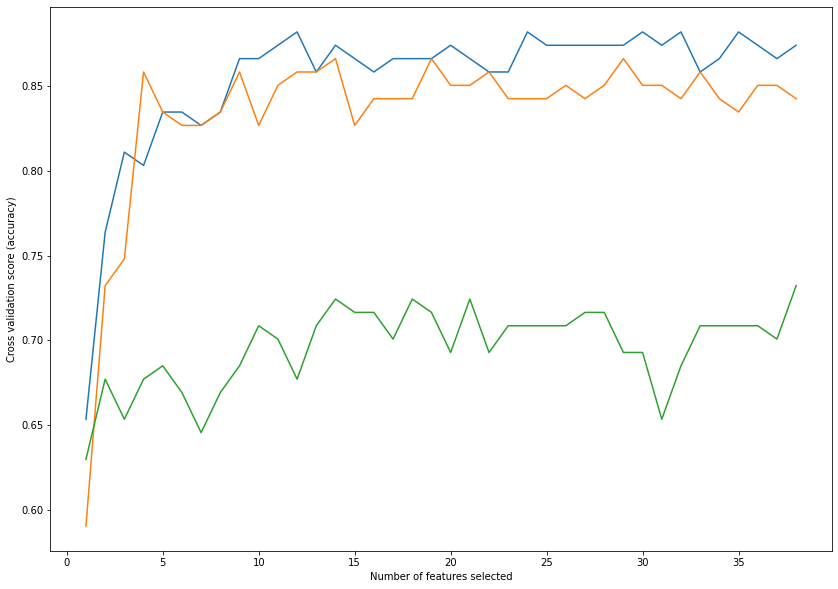

In [10]:
print("Optimal number of features : %d" % m.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(14, 10)) 
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.rcParams.update({'font.size': 16})

plt.plot(
    range(min_features_to_select, len(m.grid_scores_) + min_features_to_select),
    m.grid_scores_,
)
plt.show()

In [11]:
#SelectFromModel?


In [12]:
# m2 = SelectFromModel(LinearSVC(C=0.01, dual = False))

In [13]:
# m2.fit(train,df_blaz.values)
# m2.transform(train).shape
# train.shape


In [14]:
# m3 = SelectFromModel(LassoCV(max_iter=3000,tol=2e-4))
# m3.fit(train,df_blaz.values)
# m3.transform(train).shape
# train.shape

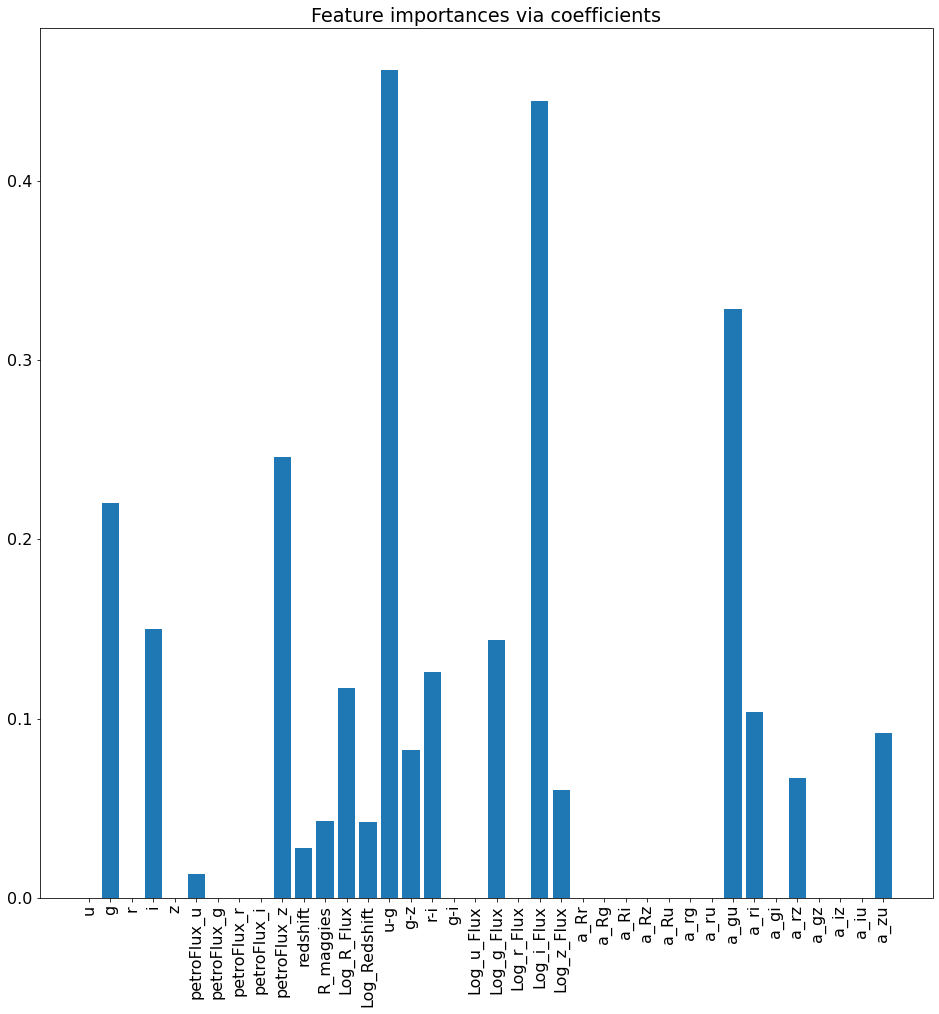

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV(max_iter=3000,tol=2e-4).fit(train, df_blaz)
importance = np.abs(lasso.coef_)
feature_names = np.array(df_noblaz.columns)
plt.figure(figsize=(16, 16)) 
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation='vertical')

plt.show()

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
cv = KFold(n_splits=10, shuffle=False)


In [17]:
df_noblaz.var()


u                   1.801786
g                   1.576958
r                   1.520093
i                   1.508375
z                   1.554097
petroFlux_u       811.538924
petroFlux_g      3217.059603
petroFlux_r     12447.254819
petroFlux_i     27724.416352
petroFlux_z     43997.526631
redshift            0.750022
R_maggies       57980.671455
Log_R_Flux          0.752379
Log_Redshift        0.250512
u-g                 0.384002
g-z                 0.410964
r-i                 0.048814
g-i                 0.285867
Log_u_Flux          0.350307
Log_g_Flux          0.284020
Log_r_Flux          0.243900
Log_i_Flux          0.242053
Log_z_Flux          0.250175
a_Rr                0.029677
a_Rg                0.027338
a_Ri                0.032076
a_Rz                0.033331
a_Ru                0.027451
a_rg                3.228784
a_ru                3.539996
a_gu               10.300472
a_ri                1.324358
a_gi                1.824136
a_rz                0.794123
a_gz          

In [18]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
pipelineC = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cv = KFold(n_splits=5 ,shuffle=False)

In [20]:
y_pred = cross_val_predict(pipelineC,train,df_blaz,cv =cv)
print(mean_squared_error(y_pred,df_blaz))
print(r2_score(y_pred,df_blaz))

0.32545931758530183
-0.8179159612128672


<AxesSubplot:>

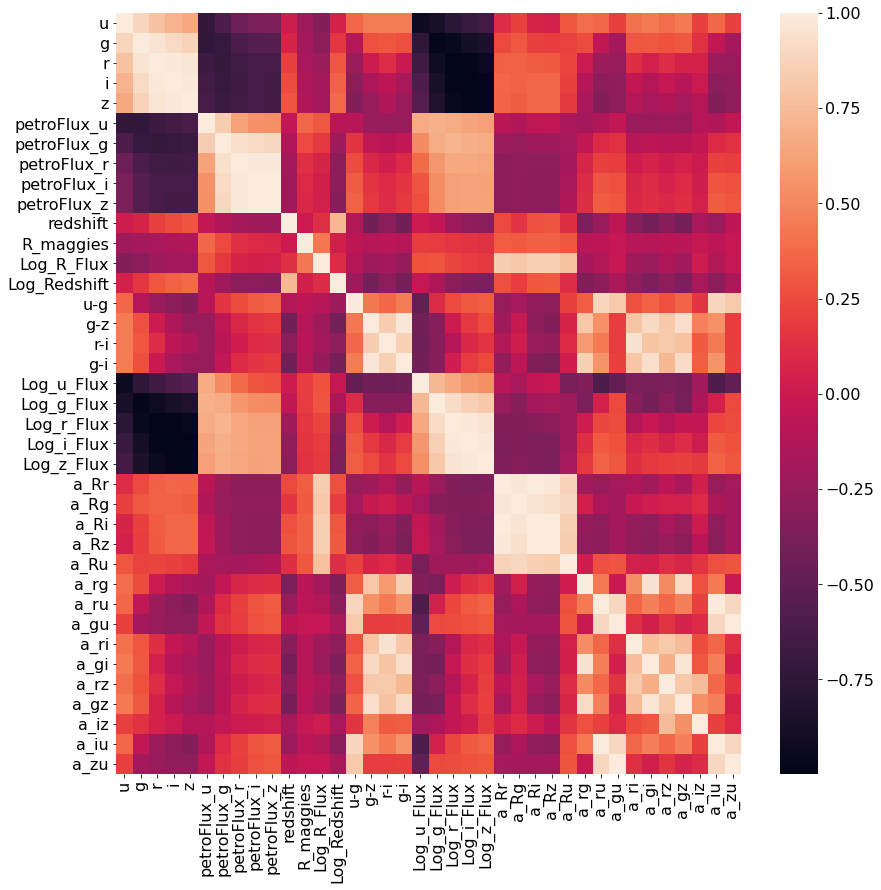

In [21]:
fig0 = plt.figure(figsize = (14,14))
sns.heatmap(df_noblaz.corr())

In [22]:
#abs(df.corr()['BLAZ'])
X = df
X.dropna()
y = X['BLAZ']
X = df.drop(columns=['BLAZ'])
X.shape[1]

42

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(KNeighborsClassifier(),
          k_features=1,
          forward = False,
          #scoring ='neg_mean_squared_error',
          cv=cv)

sfs.fit(X,y)


c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "c:\snek\python39\lib\site-pa

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\snek\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\snek\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\snek\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "c

c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\snek\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\snek\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\snek\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\snek\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "c:\snek\python39\lib\site-packages\sklearn\neighbors\_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "c

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=KNeighborsClassifier(), forward=False)

In [24]:
cor_drp =[ 0.05,0.1,0.15,0.2,0.25,0.3]

for cor_drp in cor_drp:
    ftr =  abs(df.corr()['BLAZ'][abs(df.corr()['BLAZ'])>cor_drp].drop('BLAZ')).index.tolist()
    X = df.drop(columns='BLAZ')
    X = X[ftr]
    
    print(ftr)
    y_pred = cross_val_predict(pipelineC,train,df_blaz,cv =cv)
    print( 'RMSE:'+ str(round(np.sqrt(mean_squared_error(y_pred,df_blaz)),2)))
    print('R2' + str(round(r2_score(y_pred,df_blaz),2)))
    


['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_z', 'redshift', 'peak', 'R_maggies', 'Log_R_Flux', 'u-g', 'g-z', 'r-i', 'g-i', 'Log_u_Flux', 'Log_g_Flux', 'Log_r_Flux', 'Log_i_Flux', 'Log_z_Flux', 'a_Rr', 'a_Rg', 'a_Ri', 'a_Rz', 'a_Ru', 'a_rg', 'a_ru', 'a_ri', 'a_gi', 'a_rz', 'a_gz', 'a_iz', 'a_iu']
RMSE:0.57
R2-0.82
['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroFlux_u', 'peak', 'R_maggies', 'Log_R_Flux', 'g-z', 'r-i', 'g-i', 'Log_u_Flux', 'Log_g_Flux', 'Log_r_Flux', 'Log_i_Flux', 'Log_z_Flux', 'a_Rr', 'a_Rg', 'a_Ri', 'a_Rz', 'a_Ru', 'a_ri', 'a_gi', 'a_rz', 'a_gz', 'a_iz']
RMSE:0.57
R2-0.82
['ra', 'u', 'g', 'r', 'i', 'z', 'Log_R_Flux', 'g-z', 'r-i', 'g-i', 'Log_u_Flux', 'Log_g_Flux', 'Log_r_Flux', 'Log_i_Flux', 'Log_z_Flux', 'a_Rr', 'a_Rg', 'a_Ru', 'a_ri', 'a_rz', 'a_gz', 'a_iz']
RMSE:0.57
R2-0.82
['u', 'r', 'i', 'z', 'Log_R_Flux', 'g-z', 'Log_r_Flux', 'Log_i_Flux', 'Log_z_Flux', 'a_ri', 'a_rz', 'a_iz']
RMSE:0.57
R2-0.82
['i', 'z', 'Log_R_Flux', 'Log_i_Fl

In [25]:
scaler = MinMaxScaler(feature_range=(0, 7))
scaled = scaler.fit_transform(train)
Best_Ftr = SelectKBest(score_func=chi2, k=10)
fit = Best_Ftr.fit(scaled,df_blaz)
scores = pd.DataFrame(fit.scores_)
df_featurename = pd.DataFrame(df_noblaz.columns)
ftr_score = pd.concat([df_featurename,scores],axis=1)
ftr_score.columns = ['Ftr','score']
ftr_score

Ftr      score
0              u   9.025512
1              g   8.406050
2              r  10.396889
3              i  12.022625
4              z  13.643698
5    petroFlux_u  10.676232
6    petroFlux_g   3.468455
7    petroFlux_r   0.856470
8    petroFlux_i   0.573869
9    petroFlux_z   0.856194
10      redshift   6.790338
11     R_maggies   9.772775
12    Log_R_Flux  35.584430
13  Log_Redshift   1.544674
14           u-g   0.090681
15           g-z   7.875977
16           r-i   3.510900
17           g-i   6.060611
18    Log_u_Flux   1.040979
19    Log_g_Flux   2.965130
20    Log_r_Flux  12.342708
21    Log_i_Flux  16.539187
22    Log_z_Flux  16.728012
23          a_Rr   2.877428
24          a_Rg   2.973086
25          a_Ri   2.079502
26          a_Rz   1.557959
27          a_Ru   3.591442
28          a_rg   0.793705
29          a_ru   0.417282
30          a_gu   0.042498
31          a_ri   2.689136
32          a_gi   2.136098
33          a_rz   5.085251
34          a_gz   2.914114
35          a_iz   1.511206
36          a_iu   0.417282
37          a_zu   0.042498

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model  = ExtraTreesClassifier()
model.fit(scaled,df_blaz)
print(model.feature_importances_)

[0.02381774 0.02014933 0.02834702 0.03375383 0.04383829 0.0156709
 0.01710662 0.02240985 0.02618394 0.02545903 0.02138475 0.02371721
 0.04981236 0.01822922 0.01800422 0.03218319 0.02729294 0.02576568
 0.01865806 0.01997959 0.02605218 0.03535223 0.0441702  0.03078248
 0.03357432 0.03024691 0.02620247 0.02547505 0.02296236 0.01555258
 0.01583961 0.02914999 0.02883848 0.03091203 0.02981621 0.02687195
 0.01964048 0.01679671]


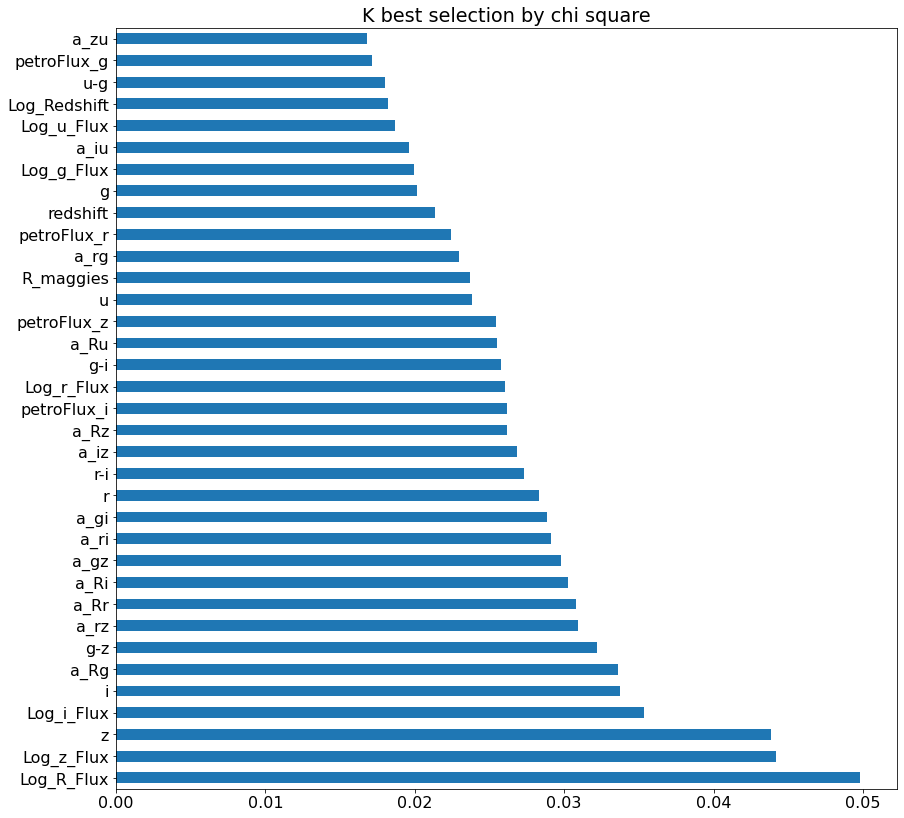

In [27]:
cfg2 = plt.figure(figsize=(14,14))
feature_importances = pd.Series(model.feature_importances_,index = feature_names)
feature_importances.nlargest(35).plot(kind='barh')
plt.title("K best selection by chi square")

plt.show()

In [28]:
# correlation = SDSS_B_CAN.corr()
# top_corr_ftr = correlation.index
# plt.figure(figsize=(20,20))
# g = sns.heatmap(correlation[top_corr_ftr].corr(),annot=True, cmap='RdYlGn')